<a href="https://colab.research.google.com/github/OdranoelJF/OdranoelJF/blob/main/predicao_fraude_gen_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/datasets/laotse/credit-risk-dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

print("Path to dataset files:", path)



100%|██████████| 368k/368k [00:00<00:00, 665kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


In [2]:
import pandas as pd

credit_df = pd.read_csv(path + "/credit_risk_dataset.csv")

# PASSO 1:
# VER O QUE TEM NO DADO
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# PASSO 2: VER O CRISP-DM

In [ ]:
# PASSO 3:
# Tenho um dataframe credit_df. Gere análises exploratórias univariadas, multivariadas gráficas e não-gráficas dos principais atributos. Incluindo

In [ ]:
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


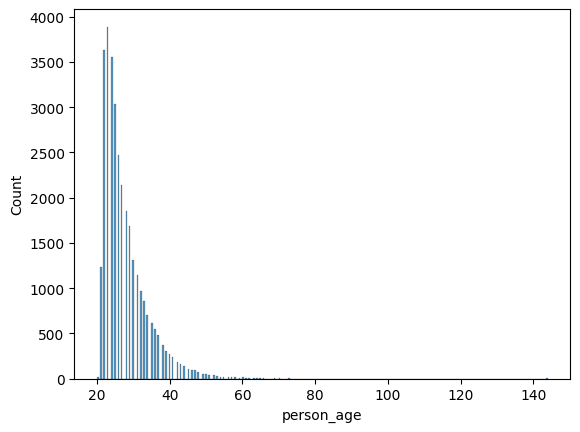

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(credit_df['person_age'])
plt.show()

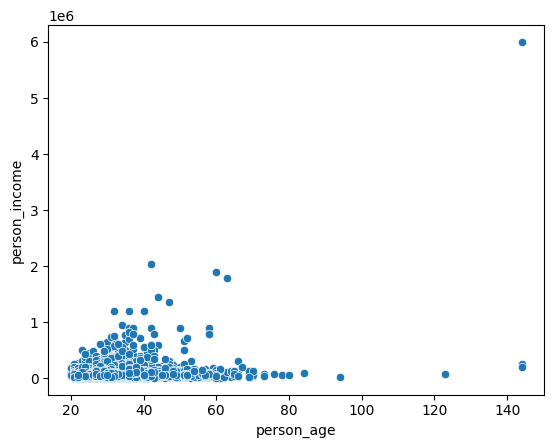

In [4]:
sns.scatterplot(x='person_age', y='person_income', data=credit_df)
plt.show()

In [ ]:
credit_df[['person_age', 'person_income']].corr()

,person_age,person_income
person_age,1.000000,0.173202
person_income,0.173202,1.000000


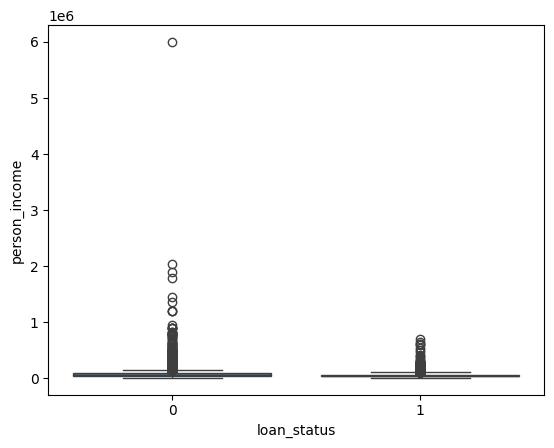

In [ ]:
sns.boxplot(x='loan_status', y='person_income', data=credit_df)
plt.show()

In [ ]:
pd.crosstab(credit_df['loan_status'], credit_df['loan_intent'])

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_status,,,,,,
0,3722,5342,2664,4450,4423,4872
1,1490,1111,941,1621,1098,847


In [5]:
# PASSO 4
# Crie um DummyClassifier.

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Divida os dados em conjuntos de treinamento e teste
X = credit_df[['person_age', 'person_income', 'loan_grade']]  # Selecione as features
y = credit_df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie um DummyClassifier com estratégia 'most_frequent'
dummy_clf = DummyClassifier(strategy="most_frequent")

# Treine o classificador
dummy_clf.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = dummy_clf.predict(X_test)

# Avalie o desempenho do modelo (acurácia)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do DummyClassifier: {accuracy}")

Acurácia do DummyClassifier: 0.7782722111400951


In [ ]:
# PASSO 4:
# Detecção baseada em regras a partir de HandcraftedClassifier(BaseEstimator, ClassifierMixin)
# Crie um classificador usando a seguinte regra manual: loan_status é 1 se loan_percent_income > 0.40 e
# person_age < 25. Implemente ManualClassifier((BaseEstimator, ClassifierMixin))

from sklearn.base import BaseEstimator, ClassifierMixin

class ManualClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            if row['loan_percent_income'] > 0.20 and row['person_age'] < 25:
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions


In [6]:
# Escreva código que instancia ManualClassifier() e avalie a acurácia dividindo o sdaod em 70% treino e 30% teste

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Divida os dados em conjuntos de treinamento e teste
X = credit_df[['loan_percent_income', 'person_age']]
y = credit_df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% treino, 30% teste

# 2. Instancie o ManualClassifier
manual_clf = ManualClassifier()

# 3. Treine o classificador (não necessário para ManualClassifier, mas incluído para consistência)
manual_clf.fit(X_train, y_train)

# 4. Faça previsões no conjunto de teste
y_pred = manual_clf.predict(X_test)

# 5. Avalie a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do ManualClassifier: {accuracy}")

NameError: name 'ManualClassifier' is not defined

In [ ]:
# PASSO 5:
# Avaliação: Precisão / Cobertura

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, make_scorer
import numpy as np

# Definição das variáveis
features = ['person_income', 'person_age', 'loan_amnt', 'loan_percent_income', 'person_emp_length']
X = credit_df[features]
y = credit_df['loan_status']

# Configuração da validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop sobre profundidades da árvore
depths = range(1, 5)
results = []

for depth in depths:
    model = RandomForestClassifier(n_estimators=10, max_depth=depth, random_state=42)

    precision = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(precision_score, average='macro'))
    recall = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(recall_score, average='macro'))

    results.append({'max_depth': depth, 'precision_mean': np.mean(precision), 'recall_mean': np.mean(recall)})

# Exibir resultados
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


   max_depth  precision_mean  recall_mean
0          1        0.842867     0.556899
1          2        0.785725     0.646935
2          3        0.797254     0.699205
3          4        0.801181     0.694461


In [ ]:
# Plote a árvore

In [ ]:
# Mostre a importância dos atributos

In [ ]:
# com validação cruzada

In [ ]:
# com  KNN / Random Forest